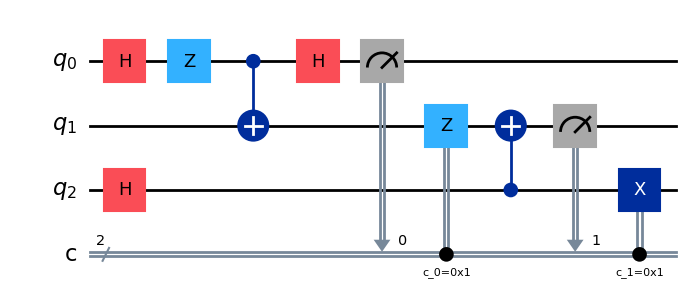

In [1]:
import qiskit 
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

QT = QuantumCircuit(3, 2) # Initialize circuit with two qubits
# Prepare quantum state
QT.h(0)
QT.z(0)
#quantum teleportation circuit
QT.cx(0,1)
QT.h(0)
QT.measure(0,0)
QT.z(1).c_if(0,1)
QT.h(2)
QT.cx(2,1)
QT.measure(1,1)
QT.x(2).c_if(1,1)

QT.draw('mpl')

In [2]:
from qiskit import QuantumCircuit, transpile

state_simulator = Aer.get_backend('statevector_simulator')
circ = transpile(QT, state_simulator)
result = state_simulator.run(circ).result()
psi = result.get_statevector(QT)
print(f'psi = {psi.round(10)!r}')

psi = array([ 0.70710678+0.j,  0.        +0.j, -0.        +0.j,  0.        +0.j,
       -0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])


C:\Users\Oleg\AppData\Local\Temp\ipykernel_2696\1120121274.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(f'psi = {psi.round(10)!r}')
